# **Introduction**

In football every player makes an impact to the teams success. It's important to recongise the players overall performance. In this project I will look into different ways that impact the athletes overall performance and I will see if I can predict a players position from there skillset.

1. Importing Libraries & Data Exploration

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression

### Possible Explorations

- Make my dream team 
- determine which countries have the highest most players 
- out of the results what nationalities are most common
- Does age have an Impact on potential?
- Predict players preferred positions from some of there skillsets

Import the csv files that I will be using these were got from the Kaggle website.

This is where I got the datasets
https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv #this has all the datasets

# **Data Understanding**

In [ ]:
#reading the fifa datasets into the project
df19 = pd.read_csv('players_19.csv')
df20 = pd.read_csv('players_20.csv')

In [ ]:
df19.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,...,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,...,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,...,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,NaN,2015-08-30,2023.0,RCM,7.0,77.0,86.0,92.0,87.0,60.0,78.0,NaN,NaN,NaN,...,76,60,87,94,79,88,67,58,51,15,13,5,10,13,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [ ]:
df19.describe

<bound method NDFrame.describe of        sofifa_id                                         player_url  ...   rcb    rb
0          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...  ...  53+3  61+3
1         158023  https://sofifa.com/player/158023/lionel-messi/...  ...  47+2  58+2
2         190871  https://sofifa.com/player/190871/neymar-da-sil...  ...  47+3  60+3
3         193080  https://sofifa.com/player/193080/david-de-gea-...  ...   NaN   NaN
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...  ...  66+3  73+3
...          ...                                                ...  ...   ...   ...
17765     238985  https://sofifa.com/player/238985/pierce-philli...  ...  48+2  46+2
17766     240160  https://sofifa.com/player/240160/alexander-kal...  ...  32+2  36+2
17767     241304  https://sofifa.com/player/241304/junliang-ma/1...  ...  46+2  49+2
17768     240158  https://sofifa.com/player/240158/christoph-ehl...  ...  44+2  45+2
17769     243961  https://sofif

In [ ]:
df19.shape

(17770, 104)

In [ ]:
df20.shape

(18278, 104)

In [ ]:
df20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


Comparing the datsets

In [ ]:
print(list(df20.columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [ ]:
print(list(df19.columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

# **Data Preparation & Cleaning**


In [ ]:
useless_column20 = ['dob','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number']

In [ ]:
useless_column19 = ['dob','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number']

In [ ]:
df19 = df19.drop(useless_column19, axis=1)

In [ ]:
df20 = df20.drop(useless_column20, axis=1)

In [ ]:
columns_19 = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [ ]:
columns_20 = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [ ]:
df19[columns_19].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [ ]:
df20[columns_20].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
for col in columns_19: 
    df19[col] = df19[col].str.split('+', n=1, expand=True)[0]
df19[columns_19]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
1,88,88,88,92,93,93,93,92,93,93,93,90,84,84,84,90,63,61,61,61,63,58,47,47,47,58
2,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17765,40,40,40,42,42,42,42,42,44,44,44,43,46,46,46,43,46,48,48,48,46,46,48,48,48,46
17766,45,45,45,48,46,46,46,48,46,46,46,47,40,40,40,47,38,34,34,34,38,36,32,32,32,36
17767,45,45,45,48,47,47,47,48,48,48,48,49,46,46,46,49,49,46,46,46,49,49,46,46,46,49
17768,46,46,46,47,46,46,46,47,45,45,45,46,41,41,41,46,46,41,41,41,46,45,44,44,44,45


In [ ]:
for col in columns_20: 
    df20[col] = df20[col].str.split('+', n=1, expand=True)[0]
df20[columns_20]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32,32,32,31,31,31,31,31,31,31,31,33,33,33,33,33,43,42,42,42,43,45,46,46,46,45
18274,33,33,33,33,32,32,32,33,33,33,33,35,36,36,36,35,44,43,43,43,44,46,47,47,47,46
18275,43,43,43,43,43,43,43,43,44,44,44,45,46,46,46,45,47,49,49,49,47,47,49,49,49,47
18276,43,43,43,45,44,44,44,45,46,46,46,46,46,46,46,46,48,48,48,48,48,48,49,49,49,48


In [ ]:
df19[columns_19] = df19[columns_19].fillna(0)

In [ ]:
df20[columns_20] = df20[columns_20].fillna(0)

In [ ]:
df19[columns_19] = df19[columns_19].astype(int)

In [ ]:
df20[columns_20] = df20[columns_20].astype(int)

I need to label the different artibutes with underscore and the year before I merge the datasets.

In [ ]:
df19['weight_19_kg'] = df19['weight_kg']
df19['club_19'] = df19['club']
df19['international_reputation_19'] = df19['international_reputation']
df19['overall_19'] = df19['overall']
df19['wage_eur_19'] = df19['wage_eur']
df19['value_eur_19'] = df19['value_eur']

In [ ]:
df19['short_name_19'] = df19['short_name']
df19['age_19'] = df19['age']
df19['height_cm_19'] = df19['height_cm']
df19['weak_foot_19'] = df19['weak_foot']
df19['potential_19'] = df19['potential']
df19['skill_moves_19'] = df19['skill_moves']
df19['release_clause_eur_19'] = df19['release_clause_eur']
df19['team_jersey_number_19'] = df19['team_jersey_number']
df19['contract_valid_until_19'] = df19['contract_valid_until']
df19['pace_19'] = df19['pace']
df19['shooting_19'] = df19['shooting']
df19['passing_19'] = df19['passing']
df19['dribbling_19'] = df19['dribbling']
df19['defending_19'] = df19['defending']
df19['physic_19'] = df19['physic']
df19['gk_diving_19'] = df19['gk_diving']
df19['gk_handling_19'] = df19['gk_handling']
df19['gk_kicking_19'] = df19['gk_kicking']
df19['gk_reflexes_19'] = df19['gk_reflexes']
df19['gk_speed_19'] = df19['gk_speed']
df19['gk_positioning_19'] = df19['gk_positioning']
df19['attacking_crossing_19'] = df19['attacking_crossing']
df19['attacking_finishing_19'] = df19['attacking_finishing']
df19['attacking_heading_accuracy_19'] = df19['attacking_heading_accuracy']
df19['attacking_short_passing_19'] = df19['attacking_short_passing']
df19['attacking_volleys_19'] = df19['attacking_volleys']
df19['skill_dribbling_19'] = df19['skill_dribbling']
df19['skill_curve_19'] = df19['skill_curve']
df19['skill_fk_accuracy_19'] = df19['skill_fk_accuracy']
df19['skill_long_passing_19'] = df19['skill_long_passing']
df19['skill_ball_control_19'] = df19['skill_ball_control']
df19['movement_acceleration_19'] = df19['movement_acceleration']
df19['movement_sprint_speed_19'] = df19['movement_sprint_speed']
df19['movement_agility_19'] = df19['movement_agility']
df19['movement_reactions_19'] = df19['movement_reactions']
df19['movement_balance_19'] = df19['movement_balance']
df19['power_shot_power_19'] = df19['power_shot_power']
df19['power_jumping_19'] = df19['power_jumping']
df19['power_stamina_19'] = df19['power_stamina']
df19['power_strength_19'] = df19['power_strength']
df19['power_long_shots_19'] = df19['power_long_shots']
df19['mentality_aggression_19'] = df19['mentality_aggression']
df19['mentality_interceptions_19'] = df19['mentality_interceptions']
df19['mentality_positioning_19'] = df19['mentality_positioning']
df19['mentality_vision_19'] = df19['mentality_vision']
df19['mentality_penalties_19'] = df19['mentality_penalties']
df19['mentality_composure_19'] = df19['mentality_composure']
df19['defending_marking_19'] = df19['defending_marking']
df19['defending_standing_tackle_19'] = df19['defending_standing_tackle']
df19['defending_sliding_tackle_19'] = df19['defending_sliding_tackle']
df19['goalkeeping_diving_19'] = df19['goalkeeping_diving']
df19['goalkeeping_handling_19'] = df19['goalkeeping_handling']
df19['goalkeeping_kicking_19'] = df19['goalkeeping_kicking']
df19['goalkeeping_positioning_19'] = df19['goalkeeping_positioning']
df19['goalkeeping_reflexes_19'] = df19['goalkeeping_reflexes']

In [ ]:
df19['ls_19'] = df19['ls']
df19['st_19'] = df19['st']
df19['rs_19'] = df19['rs']
df19['lw_19'] = df19['lw']
df19['lf_19'] = df19['lf']
df19['cf_19'] = df19['cf']
df19['rf_19'] = df19['rf']
df19['rw_19'] = df19['rw']
df19['lam_19'] = df19['lam']
df19['cam_19'] = df19['cam']
df19['ram_19'] = df19['ram']
df19['lm_19'] = df19['lm']
df19['lcm_19'] = df19['lcm']
df19['cm_19'] = df19['cm']
df19['rcm_19'] = df19['rcm']
df19['rm_19'] = df19['rm']
df19['lwb_19'] = df19['cf']
df19['ldm_19'] = df19['ldm']
df19['cdm_19'] = df19['cdm']
df19['rdm_19'] = df19['rdm']
df19['rwb_19'] = df19['rwb']
df19['lb_19'] = df19['lb']
df19['lcb_19'] = df19['lcb']
df19['cb_19'] = df19['cb']
df19['rcb_19'] = df19['rcb']
df19['rb_19'] = df19['rb']


In [ ]:
df20['player_positions_20'] = df20['player_positions']
df19['player_positions_19'] = df19['player_positions']

In [ ]:
df20['weight_20_kg'] = df20['weight_kg']
df20['club_20'] = df20['club']
df20['international_reputation_20'] = df20['international_reputation']
df20['overall_20'] = df20['overall']
df20['wage_eur_20'] = df20['wage_eur']
df20['value_eur_20'] = df20['value_eur']

In [ ]:
df20['ls_20'] = df20['ls']
df20['st_20'] = df20['st']
df20['rs_20'] = df20['rs']
df20['lw_20'] = df20['lw']
df20['lf_20'] = df20['lf']
df20['cf_20'] = df20['cf']
df20['rf_20'] = df20['rf']
df20['rw_20'] = df20['rw']
df20['lam_20'] = df20['lam']
df20['cam_20'] = df20['cam']
df20['ram_20'] = df20['ram']
df20['lm_20'] = df20['lm']
df20['lcm_20'] = df20['lcm']
df20['cm_20'] = df20['cm']
df20['rcm_20'] = df20['rcm']
df20['rm_20'] = df20['rm']
df20['lwb_20'] = df20['cf']
df20['ldm_20'] = df20['ldm']
df20['cdm_20'] = df20['cdm']
df20['rdm_20'] = df20['rdm']
df20['rwb_20'] = df20['rwb']
df20['lb_20'] = df20['lb']
df20['lcb_'] = df20['lcb']
df20['cb_20'] = df20['cb']
df20['rcb_20'] = df20['rcb']
df20['rb_20'] = df20['rb']

In [ ]:
df20['short_name_20'] = df20['short_name']
df20['age_20'] = df20['age']
df20['height_cm_20'] = df20['height_cm']
df20['weak_foot_20'] = df20['weak_foot']
df20['potential_20'] = df20['potential']
df20['skill_moves_20'] = df20['skill_moves']
df20['release_clause_eur_20'] = df20['release_clause_eur']
df20['team_jersey_number_20'] = df20['team_jersey_number']
df20['contract_valid_until_20'] = df20['contract_valid_until']
df20['pace_20'] = df20['pace']
df20['shooting_20'] = df20['shooting']
df20['passing_20'] = df20['passing']
df20['dribbling_20'] = df20['dribbling']
df20['defending_20'] = df20['defending']
df20['physic_20'] = df20['physic']
df20['gk_diving_20'] = df20['gk_diving']
df20['gk_handling_20'] = df20['gk_handling']
df20['gk_kicking_20'] = df20['gk_kicking']
df20['gk_reflexes_20'] = df20['gk_reflexes']
df20['gk_speed_20'] = df20['gk_speed']
df20['gk_positioning_20'] = df20['gk_positioning']
df20['attacking_crossing_20'] = df20['attacking_crossing']
df20['attacking_finishing_20'] = df20['attacking_finishing']
df20['attacking_heading_accuracy_20'] = df20['attacking_heading_accuracy']
df20['attacking_short_passing_20'] = df20['attacking_short_passing']
df20['attacking_volleys_20'] = df20['attacking_volleys']
df20['skill_dribbling_20'] = df20['skill_dribbling']
df20['skill_curve_20'] = df20['skill_curve']
df20['skill_fk_accuracy_20'] = df20['skill_fk_accuracy']
df20['skill_long_passing_20'] = df20['skill_long_passing']
df20['skill_ball_control_20'] = df20['skill_ball_control']
df20['movement_acceleration_20'] = df20['movement_acceleration']
df20['movement_sprint_speed_20'] = df20['movement_sprint_speed']
df20['movement_agility_20'] = df20['movement_agility']
df20['movement_reactions_20'] = df20['movement_reactions']
df20['movement_balance_20'] = df20['movement_balance']
df20['power_shot_power_20'] = df20['power_shot_power']
df20['power_jumping_20'] = df20['power_jumping']
df20['power_stamina_20'] = df20['power_stamina']
df20['power_strength_20'] = df20['power_strength']
df20['power_long_shots_20'] = df20['power_long_shots']
df20['mentality_aggression_20'] = df20['mentality_aggression']
df20['mentality_interceptions_20'] = df20['mentality_interceptions']
df20['mentality_positioning_20'] = df20['mentality_positioning']
df20['mentality_vision_20'] = df20['mentality_vision']
df20['mentality_penalties_20'] = df20['mentality_penalties']
df20['mentality_composure_20'] = df20['mentality_composure']
df20['defending_marking_20'] = df20['defending_marking']
df20['defending_standing_tackle_20'] = df20['defending_standing_tackle']
df20['defending_sliding_tackle_20'] = df20['defending_sliding_tackle']
df20['goalkeeping_diving_20'] = df20['goalkeeping_diving']
df20['goalkeeping_handling_20'] = df20['goalkeeping_handling']
df20['goalkeeping_kicking_20'] = df20['goalkeeping_kicking']
df20['goalkeeping_positioning_20'] = df20['goalkeeping_positioning']
df20['goalkeeping_reflexes_20'] = df20['goalkeeping_reflexes']

In [ ]:
# Delete the columns i don't need from the dataframe
df19 = df19.drop(["age", "weight_kg", "club","overall", "wage_eur", "value_eur","international_reputation","team_jersey_number","player_tags"], axis=1)

In [ ]:
df19 = df19.drop(['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb'], axis=1)

In [ ]:
# Delete the columns i don't need from the dataframe
df20 = df20.drop(["age", "weight_kg", "club","overall", "wage_eur", "value_eur","international_reputation","team_jersey_number","player_tags"], axis=1)

In [ ]:
df20 = df20.drop(['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb'], axis=1)

In [ ]:
df19['short_name_19']

0        Cristiano Ronaldo
1                 L. Messi
2                Neymar Jr
3                   De Gea
4             K. De Bruyne
               ...        
17765          P. Phillips
17766           A. Kaltner
17767          Ma Junliang
17768            C. Ehlich
17769             E. Tweed
Name: short_name_19, Length: 17770, dtype: object

In [ ]:
df20['cb_20']

0        52
1        53
2        46
3         0
4        49
         ..
18273    46
18274    47
18275    49
18276    49
18277    50
Name: cb_20, Length: 18278, dtype: int64

In [ ]:
df20['short_name_20']

0                 L. Messi
1        Cristiano Ronaldo
2                Neymar Jr
3                 J. Oblak
4                E. Hazard
               ...        
18273           Shao Shuai
18274         Xiao Mingjie
18275            Zhang Wei
18276         Wang Haijian
18277           Pan Ximing
Name: short_name_20, Length: 18278, dtype: object

In [ ]:
df20.head()

,sofifa_id,short_name,height_cm,nationality,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,...,gk_diving_20,gk_handling_20,gk_kicking_20,gk_reflexes_20,gk_speed_20,gk_positioning_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,movement_reactions_20,movement_balance_20,power_shot_power_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,defending_marking_20,defending_standing_tackle_20,defending_sliding_tackle_20,goalkeeping_diving_20,goalkeeping_handling_20,goalkeeping_kicking_20,goalkeeping_positioning_20,goalkeeping_reflexes_20
0,158023,L. Messi,170,Argentina,94,"RW, CF, ST",Left,4,4,Medium/Low,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,...,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,187,Portugal,93,"ST, LW",Right,4,5,High/Low,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,...,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,Neymar Jr,175,Brazil,92,"LW, CAM",Right,5,5,High/Medium,195200000.0,CAM,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,...,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,J. Oblak,188,Slovenia,93,GK,Right,3,1,Medium/Medium,164700000.0,GK,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,...,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,E. Hazard,175,Belgium,91,"LW, CF",Right,4,4,High/Medium,184500000.0,LW,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,...,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [ ]:
df19.describe()#computes a summary of statistics pertaining to the DataFrame columns the statistics are labeled at the start of each row

,sofifa_id,height_cm,potential,weak_foot,skill_moves,release_clause_eur,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,weight_19_kg,international_reputation_19,overall_19,wage_eur_19,value_eur_19,age_19,height_cm_19,weak_foot_19,potential_19,skill_moves_19,release_clause_eur_19,team_jersey_number_19,contract_valid_until_19,pace_19,shooting_19,passing_19,dribbling_19,defending_19,physic_19,gk_diving_19,gk_handling_19,gk_kicking_19,gk_reflexes_19,gk_speed_19,gk_positioning_19,ls_19,st_19,rs_19,lw_19,lf_19,cf_19,rf_19,rw_19,lam_19,cam_19,ram_19,lm_19,lcm_19,cm_19,rcm_19,rm_19,lwb_19,ldm_19,cdm_19,rdm_19,rwb_19,lb_19,lcb_19,cb_19,rcb_19,rb_19
count,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,1.625700e+04,17547.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,17770.000000,17770.000000,17770.000000,17770.000000,1.777000e+04,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,1.625700e+04,17547.000000,17547.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000
mean,213797.776308,181.253292,71.382949,2.946427,2.346595,4.645685e+06,2020.130507,67.815319,52.248733,57.082172,62.267169,51.665484,64.972567,65.374622,62.931017,61.511078,66.149043,38.675730,63.088117,75.310917,1.117783,66.240405,9956.162071,2.440756e+06,25.193922,181.253292,2.946427,71.382949,2.346595,4.645685e+06,19.667408,2020.130507,67.815319,52.248733,57.082172,62.267169,51.665484,64.972567,65.374622,62.931017,61.511078,66.149043,38.675730,63.088117,51.287957,51.287957,51.287957,52.354643,52.071075,52.071075,52.071075,52.354643,52.305965,52.305965,52.305965,52.961564,51.620990,51.620990,51.620990,52.961564,52.071075,50.380810,50.380810,50.380810,50.989871,50.366348,49.323073,49.323073,49.323073,50.366348
std,29955.746535,6.745892,6.145171,0.659353,0.749672,1.123030e+07,1.300184,11.329319,14.034645,10.589207,10.442659,16.347564,9.745859,7.807033,7.556389,7.667533,8.234898,10.420846,8.664458,7.080013,0.401085,6.994104,22330.640048,5.644779e+06,4.651957,6.745892,0.659353,6.145171,0.749672,1.123030e+07,16.112007,1.300184,11.329319,14.034645,10.589207,10.442659,16.347564,9.745859,7.807033,7.556389,7.667533,8.234898,10.420846,8.664458,20.148100,20.148100,20.148100,20.799731,20.694179,20.694179,20.694179,20.799731,20.740511,20.740511,20.740511,20.735083,20.130701,20.130701,20.130701,20.735083,20.694179,20.263424,20.263424,20.263424,19.985402,20.014851,20.705613,20.705613,20.705613,20.014851
min,164.000000,154.000000,48.000000,1.000000,1.000000,1.300000e+04,2018.000000,24.000000,15.000000,24.000000,23.000000,15.000000,30.000000,45.000000,43.000000,35.000000,44.000000,12.000000,38.000000,50.000000,1.000000,47.000000,0.000000,0.000000e+00,16.000000,154.000000,1.000000,48.000000,1.000000,1.300000e+04,1.000000,2018.000000,24.000000,15.000000,24.000000,23.000000,15.000000,30.000000,45.000000,43.000000,35.000000,44.000000,12.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199803.000000,176.000000,67.000000,3.000000,2.000000,5.250000e+05,2019.000000,61.000000,42.000000,50.000000,57.000000,37.000000,59.000000,60.000000,58.000000,56.000000,60.000000,30.000000,57.000000,70.000000,1.000000,62.000000,1000.000000,3.000000e+05,

In [ ]:
df20.describe()#computes a summary of statistics pertaining to the DataFrame columns the statistics are labeled at the start of each row

,sofifa_id,height_cm,potential,weak_foot,skill_moves,release_clause_eur,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,...,gk_diving_20,gk_handling_20,gk_kicking_20,gk_reflexes_20,gk_speed_20,gk_positioning_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,movement_reactions_20,movement_balance_20,power_shot_power_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,defending_marking_20,defending_standing_tackle_20,defending_sliding_tackle_20,goalkeeping_diving_20,goalkeeping_handling_20,goalkeeping_kicking_20,goalkeeping_positioning_20,goalkeeping_reflexes_20
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,...,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,181.362184,71.546887,2.944250,2.368038,4.740717e+06,2021.114591,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,...,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,6.756961,6.139669,0.664656,0.765038,1.103002e+07,1.289888,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,...,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.9

In [ ]:
df20.head()

,sofifa_id,short_name,height_cm,nationality,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,...,gk_diving_20,gk_handling_20,gk_kicking_20,gk_reflexes_20,gk_speed_20,gk_positioning_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,movement_reactions_20,movement_balance_20,power_shot_power_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,defending_marking_20,defending_standing_tackle_20,defending_sliding_tackle_20,goalkeeping_diving_20,goalkeeping_handling_20,goalkeeping_kicking_20,goalkeeping_positioning_20,goalkeeping_reflexes_20
0,158023,L. Messi,170,Argentina,94,"RW, CF, ST",Left,4,4,Medium/Low,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,...,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,187,Portugal,93,"ST, LW",Right,4,5,High/Low,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,...,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,Neymar Jr,175,Brazil,92,"LW, CAM",Right,5,5,High/Medium,195200000.0,CAM,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,...,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,J. Oblak,188,Slovenia,93,GK,Right,3,1,Medium/Medium,164700000.0,GK,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,...,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,E. Hazard,175,Belgium,91,"LW, CF",Right,4,4,High/Medium,184500000.0,LW,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,...,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [ ]:
df19.head()

,sofifa_id,short_name,height_cm,nationality,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,...,mentality_interceptions_19,mentality_positioning_19,mentality_vision_19,mentality_penalties_19,mentality_composure_19,defending_marking_19,defending_standing_tackle_19,defending_sliding_tackle_19,goalkeeping_diving_19,goalkeeping_handling_19,goalkeeping_kicking_19,goalkeeping_positioning_19,goalkeeping_reflexes_19,ls_19,st_19,rs_19,lw_19,lf_19,cf_19,rf_19,rw_19,lam_19,cam_19,ram_19,lm_19,lcm_19,cm_19,rcm_19,rm_19,lwb_19,ldm_19,cdm_19,rdm_19,rwb_19,lb_19,lcb_19,cb_19,rcb_19,rb_19,player_positions_19
0,20801,Cristiano Ronaldo,187,Portugal,94,"ST, LW",Right,4,5,High/Low,127100000.0,LW,2018-07-10,2022.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,...,29,95,82,85,95,28,31,23,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,90,61,61,61,65,61,53,53,53,61,"ST, LW"
1,158023,L. Messi,170,Argentina,94,"CF, RW, ST",Left,4,4,Medium/Medium,226500000.0,RW,2004-07-01,2021.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,93,94,87,96,91,86,91,...,22,94,94,75,96,33,28,26,6,11,15,14,8,88,88,88,92,93,93,93,92,93,93,93,90,84,84,84,90,93,61,61,61,63,58,47,47,47,58,"CF, RW, ST"
2,190871,Neymar Jr,175,Brazil,93,"LW, CAM",Right,5,5,High/Medium,228100000.0,CAM,2017-08-03,2022.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,88,87,78,95,94,90,96,...,36,89,87,81,94,27,24,33,9,9,15,15,11,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,89,60,60,60,65,60,47,47,47,60,"LW, CAM"
3,193080,De Gea,193,Spain,93,GK,Right,3,1,Medium/Medium,138600000.0,GK,2011-07-01,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,21,19,51,42,57,58,60,...,30,12,68,40,68,15,21,13,90,85,87,88,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GK
4,192985,K. De Bruyne,181,Belgium,92,"CAM, CM",Right,5,4,High/High,196400000.0,RCM,2015-08-30,2023.0,77.0,86.0,92.0,87.0,60.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Leadership, Early Crosser, Long Passer (CPU AI...",93,83,55,92,82,86,85,83,91,91,78,76,79,...,60,87,94,79,88,67,58,51,15,13,5,10,13,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,87,77,77,77,77,73,66,66,66,73,"CAM, CM"


Merging the datsets 

In [ ]:
fullDf =pd.merge(df19,df20,
                  on='sofifa_id',
                  how='right').drop_duplicates()

In [ ]:
fullDf.shape

(18278, 297)

In [ ]:
fullDf.head()

,sofifa_id,short_name_x,height_cm_x,nationality_x,potential_x,player_positions_x,preferred_foot_x,weak_foot_x,skill_moves_x,work_rate_x,release_clause_eur_x,team_position_x,joined_x,contract_valid_until_x,pace_x,shooting_x,passing_x,dribbling_x,defending_x,physic_x,gk_diving_x,gk_handling_x,gk_kicking_x,gk_reflexes_x,gk_speed_x,gk_positioning_x,player_traits_x,attacking_crossing_x,attacking_finishing_x,attacking_heading_accuracy_x,attacking_short_passing_x,attacking_volleys_x,skill_dribbling_x,skill_curve_x,skill_fk_accuracy_x,skill_long_passing_x,skill_ball_control_x,movement_acceleration_x,movement_sprint_speed_x,movement_agility_x,...,gk_diving_20,gk_handling_20,gk_kicking_20,gk_reflexes_20,gk_speed_20,gk_positioning_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,movement_reactions_20,movement_balance_20,power_shot_power_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,defending_marking_20,defending_standing_tackle_20,defending_sliding_tackle_20,goalkeeping_diving_20,goalkeeping_handling_20,goalkeeping_kicking_20,goalkeeping_positioning_20,goalkeeping_reflexes_20
0,158023,L. Messi,170.0,Argentina,94.0,"CF, RW, ST",Left,4.0,4.0,Medium/Medium,226500000.0,RW,2004-07-01,2021.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,93,94,87,96,91,86,91,...,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,187.0,Portugal,94.0,"ST, LW",Right,4.0,5.0,High/Low,127100000.0,LW,2018-07-10,2022.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,...,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,Neymar Jr,175.0,Brazil,93.0,"LW, CAM",Right,5.0,5.0,High/Medium,228100000.0,CAM,2017-08-03,2022.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,88,87,78,95,94,90,96,...,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,J. Oblak,188.0,Slovenia,93.0,GK,Right,3.0,1.0,Medium/Medium,144500000.0,GK,2014-07-17,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0,92.0,78.0,89.0,52.0,88.0,"Puncher, GK Long Throw, Comes For Crosses",13,11,15,29,13,12,13,14,26,16,43,60,67,...,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,E. Hazard,173.0,Belgium,91.0,"LW, CF",Right,4.0,4.0,High/Medium,172100000.0,LW,2012-07-01,2020.0,91.0,82.0,86.0,94.0,35.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Finesse Shot, Flair, Playma...",81,84,61,89,80,95,83,79,83,94,93,89,95,...,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


Analyze players based on nationality

The unique function here returns the sorted unique elements of an array.

In [ ]:
fullDf['nationality_x'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Slovenia', 'Belgium',
       'Germany', 'Netherlands', 'Croatia', 'Egypt', 'France', 'Senegal',
       'England', 'Spain', 'Italy', 'Uruguay', 'Poland', 'Denmark',
       'Gabon', 'Korea Republic', 'Costa Rica', 'Slovakia',
       'Bosnia Herzegovina', 'Serbia', 'Scotland', 'Hungary',
       'Switzerland', 'Greece', 'Austria', 'Morocco', 'Sweden', 'Wales',
       'Colombia', 'Czech Republic', 'Chile', 'Algeria', 'Ivory Coast',
       'Togo', 'Norway', 'Mexico', 'Iceland', 'Finland', 'Jamaica',
       'Albania', 'Guinea', 'Cameroon', 'Ghana', 'Montenegro', 'Ukraine',
       'Russia', 'DR Congo', nan, 'Venezuela', 'Nigeria', 'Armenia',
       'Israel', 'Paraguay', 'Australia', 'Turkey', 'Romania', 'Japan',
       'Mali', 'United States', 'Kosovo', 'Dominican Republic',
       'Tanzania', 'China PR', 'Northern Ireland', 'Republic of Ireland',
       'Tunisia', 'Cape Verde', 'FYR Macedonia', 'Burkina Faso', 'Kenya',
       'Angola', 'South Africa'

In [ ]:
top_country = fullDf['nationality_x'].value_counts().head(15)

top_country

England          1290
Germany           949
Spain             803
France            705
Argentina         660
Brazil            635
Italy             531
Colombia          403
Japan             309
Netherlands       305
China PR          271
Chile             264
United States     263
Norway            261
Denmark           254
Name: nationality_x, dtype: int64

Here I am using a subplot to display the top 15 countries with the most amount of players.

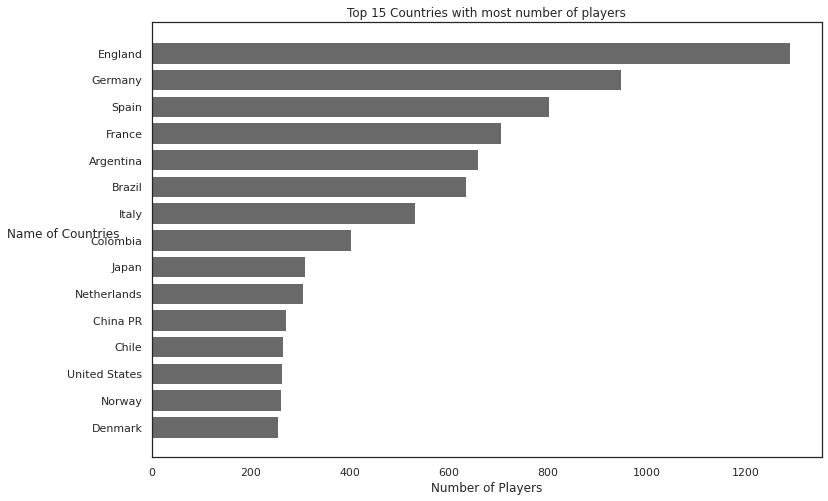

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
x = top_country.values
y = top_country.index
ax.barh(y, x, align='center', color='dimgray')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Players')
ax.set_ylabel('Name of Countries', rotation=0)
ax.set_title('Top 15 Countries with most number of players')
plt.show()

The above graph tells us that most of the players are from UK, Germany,Spain,Argentina,France,Brazil etc.

# **Does Age have an Impact on potential?**

Text(0.5, 1.0, 'Age vs Potential')

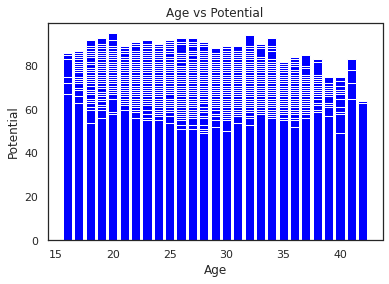

In [ ]:
# bar-plot for age and potential
plt.bar(fullDf['age_20'],df20['potential_20'],color='blue')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title("Age vs Potential")
# Potential falls with increase in age

Text(0.5, 1.0, 'Age vs Potential')

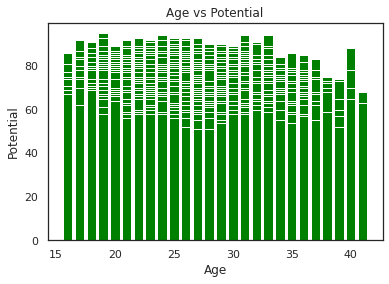

In [ ]:
# bar-plot for age and potential
plt.bar(fullDf['age_19'],fullDf['potential_19'],color='green')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title("Age vs Potential")
# Potential falls with increase in age

Above bar-plot shows the data for fifa 19 and fifa 20 and you can clearly see that players ages increase there potential falls.

# K-means clustering 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

K means algorthim identifes k number of centroids, and then allocates every data point to the nearest cluster all the while keeping the centroids as small as possible. 

I am only going to select number values and the players short names and see if I can cluster the players postions

In [ ]:
kMeansDf = fullDf[['short_name_20','age_20', 'height_cm_20','overall_20', 'potential_20',
'value_eur_20', 'wage_eur_20', 'international_reputation_20', 'weak_foot_20',
'skill_moves_20', 'team_jersey_number_20','pace_20', 'shooting_20',
'passing_20', 'dribbling_20', 'defending_20', 'physic_20', 'gk_diving_20',
'gk_handling_20', 'gk_kicking_20', 'gk_reflexes_20', 'gk_speed_20',
'gk_positioning_20', 'attacking_crossing_20', 'attacking_finishing_20',
'attacking_heading_accuracy_20', 'attacking_short_passing_20',
'attacking_volleys_20', 'skill_dribbling_20', 'skill_curve_20',
'skill_fk_accuracy_20', 'skill_long_passing_20', 'skill_ball_control_20',
'movement_acceleration_20', 'movement_sprint_speed_20', 'movement_agility_20',
'movement_reactions_20', 'movement_balance_20', 'power_shot_power_20',
'power_jumping_20', 'power_stamina_20', 'power_strength_20', 'power_long_shots_20',
'mentality_aggression_20', 'mentality_interceptions_20',
'mentality_positioning_20', 'mentality_vision_20', 'mentality_penalties_20',
'mentality_composure_20', 'defending_marking_20', 'defending_standing_tackle_20',
'defending_sliding_tackle_20', 'goalkeeping_diving_20',
'goalkeeping_handling_20', 'goalkeeping_kicking_20',
'goalkeeping_positioning_20', 'goalkeeping_reflexes_20']]

In [ ]:
kMeansDf.shape

(18278, 57)

In [ ]:
df = kMeansDf[kMeansDf.overall_20 > 86] # extract players with overall above 86 because otherwise we have 18000 players which is too big and plus I only want to see the best players.

In [ ]:
#I will replace all null values with the average

df = df.fillna(df.mean())

In [ ]:
df.head()

,short_name_20,age_20,height_cm_20,overall_20,potential_20,value_eur_20,wage_eur_20,international_reputation_20,weak_foot_20,skill_moves_20,team_jersey_number_20,pace_20,shooting_20,passing_20,dribbling_20,defending_20,physic_20,gk_diving_20,gk_handling_20,gk_kicking_20,gk_reflexes_20,gk_speed_20,gk_positioning_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,movement_reactions_20,movement_balance_20,power_shot_power_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,defending_marking_20,defending_standing_tackle_20,defending_sliding_tackle_20,goalkeeping_diving_20,goalkeeping_handling_20,goalkeeping_kicking_20,goalkeeping_positioning_20,goalkeeping_reflexes_20
0,L. Messi,32,170,94,94,95500000,565000,5,4,4,10.0,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,93,93,58500000,405000,5,4,5,7.0,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,87.5,85.1,80.0,89.2,54.4,86.4,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,92,92,105500000,290000,5,5,5,10.0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87.5,85.1,80.0,89.2,54.4,86.4,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,91,93,77500000,125000,3,3,1,13.0,75.488889,74.666667,78.844444,81.977778,61.333333,73.777778,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,91,91,90000000,470000,4,4,4,7.0,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


I need to save the name for later as when normalising it only excepts number values.

In [ ]:
names = df['short_name_20'].tolist() 

df = df.drop(['short_name_20'], axis=1)

In [ ]:
df.head()#names have been removed and saved for later use.

,age_20,height_cm_20,overall_20,potential_20,value_eur_20,wage_eur_20,international_reputation_20,weak_foot_20,skill_moves_20,team_jersey_number_20,pace_20,shooting_20,passing_20,dribbling_20,defending_20,physic_20,gk_diving_20,gk_handling_20,gk_kicking_20,gk_reflexes_20,gk_speed_20,gk_positioning_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,movement_reactions_20,movement_balance_20,power_shot_power_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,defending_marking_20,defending_standing_tackle_20,defending_sliding_tackle_20,goalkeeping_diving_20,goalkeeping_handling_20,goalkeeping_kicking_20,goalkeeping_positioning_20,goalkeeping_reflexes_20
0,32,170,94,94,95500000,565000,5,4,4,10.0,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,93,93,58500000,405000,5,4,5,7.0,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,87.5,85.1,80.0,89.2,54.4,86.4,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,92,92,105500000,290000,5,5,5,10.0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87.5,85.1,80.0,89.2,54.4,86.4,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,91,93,77500000,125000,3,3,1,13.0,75.488889,74.666667,78.844444,81.977778,61.333333,73.777778,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,91,91,90000000,470000,4,4,4,7.0,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


Algorthims preform better when variables are on a smaller scale. Therefore it is common to normalize the data before training machine learning models on it.

In [ ]:
from sklearn import preprocessing
x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

https://www.kaggle.com/arthurtok/principal-component-analysis-with-kmeans-visuals

Prinical component analysis (PCA) to reduce 60 dimensions into 2 for the plot. I am using the fit_transform(X) this fits the model with X and applies the dimensionality on X

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

Performing K-Means Clustering

I specify the number of clusters then I fit the input data and get the labels. centriods are location representing the centre of the cluster.

In [ ]:
from sklearn.cluster import KMeans
# specify the number of clusters
kmeans = KMeans(n_clusters=5)
# fit the input data
kmeans = kmeans.fit(reduced)
# get the cluster labels
labels = kmeans.predict(reduced)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()

Make a new data frame by adding players’ names and their clusters.


In [ ]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.434203,-1.274037,3,L. Messi
1,-1.200751,-0.966525,3,Cristiano Ronaldo
2,-1.272526,-1.411743,3,Neymar Jr
3,2.979501,-0.664687,1,J. Oblak
4,-1.168882,-1.169876,3,E. Hazard


Visuallly seeing the results

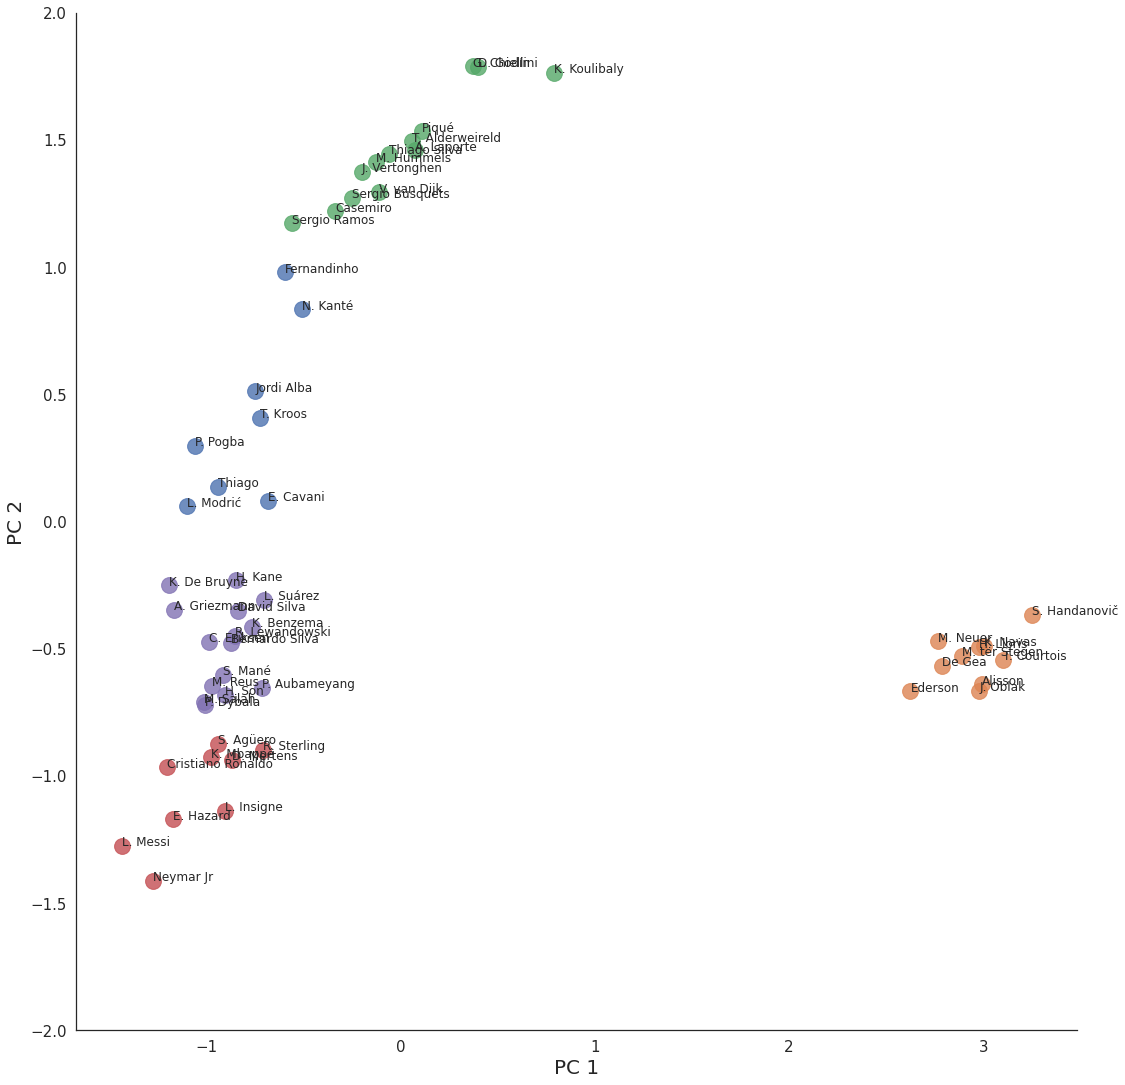

In [ ]:
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
fit_reg=False, height = 15, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
  texts.append(plt.text(x, y, s))
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

You can see from the clustering that the 
- Orange is all the goalies
- Green is the defenders
- Red is the midfielders 
- Purple are the wingers 
- Blue are the strikers

The clusters have been formed on the players positions.

From the results above you can see some of the strikers like to drop deep to get the ball and are not out and out strikers this puts them in the midfield bracket.

In conclusion, the K-means clustering technique is a simple quick algorithm that can be applied to large datasets to separate them into different partitions

<h4>The following was got from this link while I used the code I still had to modify it to use it on my dataset.</h4>

https://www.kaggle.com/laowingkin/fifa-18-predict-player-s-positions


<h1>Predict Player Position through Machine Learning
</h1>
- Predict binary targets (attack vs defend positions) with logistic regression

In [ ]:
df = fullDf[['pace_20', 'shooting_20',
'passing_20', 'dribbling_20', 'defending_20', 'physic_20','attacking_crossing_20', 'attacking_finishing_20',
'attacking_heading_accuracy_20', 'attacking_short_passing_20',
'attacking_volleys_20', 'skill_dribbling_20', 'skill_curve_20',
'skill_fk_accuracy_20', 'skill_long_passing_20', 'skill_ball_control_20',
'movement_acceleration_20', 'movement_sprint_speed_20', 'movement_agility_20',
'movement_reactions_20', 'movement_balance_20', 'power_shot_power_20',
'power_jumping_20', 'power_stamina_20', 'power_strength_20', 'power_long_shots_20',
'mentality_aggression_20', 'mentality_interceptions_20',
'mentality_positioning_20', 'mentality_vision_20', 'mentality_penalties_20',
'mentality_composure_20', 'defending_marking_20', 'defending_standing_tackle_20','player_positions_20']]

In [ ]:
columns_needed = ['pace_20', 'shooting_20',
'passing_20', 'dribbling_20','attacking_crossing_20', 'attacking_finishing_20',
'attacking_heading_accuracy_20', 'attacking_short_passing_20',
'attacking_volleys_20', 'skill_dribbling_20', 'skill_curve_20',
'skill_fk_accuracy_20', 'skill_long_passing_20', 'skill_ball_control_20',
'movement_acceleration_20', 'movement_sprint_speed_20', 'movement_agility_20',
'defending_marking_20', 'defending_20', 'defending_standing_tackle_20',
'power_jumping_20', 'power_stamina_20', 'power_strength_20', 'power_long_shots_20',
'mentality_aggression_20', 'mentality_interceptions_20',
'mentality_positioning_20', 'mentality_vision_20', 'mentality_penalties_20',
'mentality_composure_20','player_positions_20']

In [ ]:
df = df[columns_needed]
df.head()

,pace_20,shooting_20,passing_20,dribbling_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,defending_marking_20,defending_20,defending_standing_tackle_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,player_positions_20
0,87.0,92.0,92.0,96.0,88,95,70,92,88,97,93,94,92,96,91,84,93,33,39.0,37,68,75,68,94,48,40,94,94,75,96,"RW, CF, ST"
1,90.0,93.0,82.0,89.0,84,94,89,83,87,89,81,76,77,92,89,91,87,28,35.0,32,95,85,78,93,63,29,95,82,85,95,"ST, LW"
2,91.0,85.0,87.0,95.0,87,87,62,87,87,96,88,87,81,95,94,89,96,27,32.0,26,61,81,49,84,51,36,87,90,90,94,"LW, CAM"
3,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,27,NaN,12,78,41,78,12,34,19,11,65,11,68,GK
4,91.0,83.0,86.0,94.0,81,84,61,89,83,95,83,79,83,94,94,88,95,34,35.0,27,56,84,63,80,54,41,87,89,88,91,"LW, CF"


Goal keeper position is too easy to dertermine due to different skill atributes so we don't need it.

In [ ]:
df['player_positions_20'].str.strip()
df = df[df['player_positions_20'] != 'GK']
df.head()

,pace_20,shooting_20,passing_20,dribbling_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,defending_marking_20,defending_20,defending_standing_tackle_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,player_positions_20
0,87.0,92.0,92.0,96.0,88,95,70,92,88,97,93,94,92,96,91,84,93,33,39.0,37,68,75,68,94,48,40,94,94,75,96,"RW, CF, ST"
1,90.0,93.0,82.0,89.0,84,94,89,83,87,89,81,76,77,92,89,91,87,28,35.0,32,95,85,78,93,63,29,95,82,85,95,"ST, LW"
2,91.0,85.0,87.0,95.0,87,87,62,87,87,96,88,87,81,95,94,89,96,27,32.0,26,61,81,49,84,51,36,87,90,90,94,"LW, CAM"
4,91.0,83.0,86.0,94.0,81,84,61,89,83,95,83,79,83,94,94,88,95,34,35.0,27,56,84,63,80,54,41,87,89,88,91,"LW, CF"
5,76.0,86.0,92.0,86.0,93,82,55,92,82,86,85,83,91,91,77,76,78,68,61.0,58,63,89,74,90,76,61,88,94,79,91,"CAM, CM"


In [ ]:
df.tail()

,pace_20,shooting_20,passing_20,dribbling_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,defending_marking_20,defending_20,defending_standing_tackle_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,player_positions_20
18273,57.0,23.0,28.0,33.0,21,17,40,35,27,24,23,21,28,35,56,58,45,45,47.0,50,70,60,47,16,46,48,28,25,39,41,CB
18274,58.0,24.0,33.0,35.0,24,20,42,43,28,32,24,29,39,31,55,61,43,42,48.0,53,72,55,44,20,42,49,23,25,37,35,CB
18275,54.0,35.0,44.0,45.0,32,33,49,53,32,40,32,32,55,49,55,54,52,46,48.0,52,60,50,51,26,50,45,38,38,36,39,CM
18276,59.0,35.0,47.0,47.0,39,34,47,54,28,42,37,39,48,49,55,63,55,39,45.0,44,61,42,55,28,57,49,31,48,36,40,CM
18277,60.0,32.0,51.0,45.0,44,30,48,58,25,40,34,35,52,46,54,64,52,52,47.0,42,64,40,61,30,54,47,29,52,38,42,CM


In [ ]:
df.head()

,pace_20,shooting_20,passing_20,dribbling_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,defending_marking_20,defending_20,defending_standing_tackle_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,player_positions_20
0,87.0,92.0,92.0,96.0,88,95,70,92,88,97,93,94,92,96,91,84,93,33,39.0,37,68,75,68,94,48,40,94,94,75,96,"RW, CF, ST"
1,90.0,93.0,82.0,89.0,84,94,89,83,87,89,81,76,77,92,89,91,87,28,35.0,32,95,85,78,93,63,29,95,82,85,95,"ST, LW"
2,91.0,85.0,87.0,95.0,87,87,62,87,87,96,88,87,81,95,94,89,96,27,32.0,26,61,81,49,84,51,36,87,90,90,94,"LW, CAM"
4,91.0,83.0,86.0,94.0,81,84,61,89,83,95,83,79,83,94,94,88,95,34,35.0,27,56,84,63,80,54,41,87,89,88,91,"LW, CF"
5,76.0,86.0,92.0,86.0,93,82,55,92,82,86,85,83,91,91,77,76,78,68,61.0,58,63,89,74,90,76,61,88,94,79,91,"CAM, CM"


Check for any missing values

In [ ]:
df.isnull().values.any()

False

All outcomes for the player positions

In [ ]:
p = df['player_positions_20'].str.split().apply(lambda x: x[0]).unique()
p

array(['RW,', 'ST,', 'LW,', 'CAM,', 'CB', 'CM', 'ST', 'CDM,', 'CF,',
       'CM,', 'CB,', 'CDM', 'LB', 'LW', 'RB,', 'LB,', 'RB', 'RM,', 'LM,',
       'CAM', 'LM', 'LWB,', 'RWB,', 'RW', 'RM', 'CF', 'RWB', 'LWB'],
      dtype=object)

Handle players with more than one position

In [ ]:
df_new = df.copy()
df_new.drop(df_new.index, inplace=True)

for i in p:
    df_temp = df[df['player_positions_20'].str.contains(i)]
    df_temp['player_positions_20'] = i
    df_new = df_new.append(df_temp, ignore_index=True)
    
df_new.iloc[::500, :]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pace_20,shooting_20,passing_20,dribbling_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,defending_marking_20,defending_20,defending_standing_tackle_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,player_positions_20
0,87.0,92.0,92.0,96.0,88,95,70,92,88,97,93,94,92,96,91,84,93,33,39.0,37,68,75,68,94,48,40,94,94,75,96,"RW,"
500,72.0,78.0,75.0,77.0,74,77,68,75,78,78,82,77,69,79,73,71,70,25,32.0,24,63,67,69,75,67,38,78,78,79,75,"ST,"
1000,85.0,62.0,57.0,68.0,59,61,52,59,52,68,59,56,52,66,82,87,76,53,42.0,41,70,72,73,64,49,27,67,55,51,58,"ST,"
1500,86.0,67.0,66.0,75.0,68,66,59,70,70,74,63,51,60,75,85,86,80,55,44.0,40,65,69,64,69,57,36,68,64,58,71,"LW,"
2000,65.0,68.0,75.0,77.0,76,70,34,77,71,77,76,65,75,78,65,65,74,36,39.0,43,60,64,55,66,41,40,72,75,69,72,"CAM,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37000,86.0,60.0,60.0,67.0,61,63,58,62,41,67,52,40,60,66,85,87,79,40,43.0,42,63,69,76,56,57,45,64,61,60,65,RM
37500,63.0,48.0,59.0,65.0,62,49,50,62,40,65,42,37,58,64,61,64,71,62,61.0,61,60,78,66,41,51,66,56,59,59,63,RM
38000,70.0,50.0,53.0,59.0,58,55,52,56,43,62,45,35,51,60,67,73,49,31,35.0,41,53,55,41,41,45,23,56,52,41,50,RM
38500,86.0,58.0,53.0,71.0,51,59,31,58,53,68,64,46,45,66,90,82,94,21,23.0,20,62,73,31,57,41,23,54,50,49,64,CF


In [ ]:
#two player positions went in
#df.drop(df.columns[31], axis=1, inplace= True)

Some of the attributes have '+/-' sign, let's perform the calculation rather than keeping them as string:

In [ ]:
cols = [col for col in df_new.columns if col not in ['player_positions_20']]

for i in cols:
    df_new[i] = df_new[i].apply(lambda x: eval(x) if isinstance(x,str) else x)

df_new.iloc[::500, :]

,pace_20,shooting_20,passing_20,dribbling_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,defending_marking_20,defending_20,defending_standing_tackle_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,player_positions_20
0,87.0,92.0,92.0,96.0,88,95,70,92,88,97,93,94,92,96,91,84,93,33,39.0,37,68,75,68,94,48,40,94,94,75,96,"RW,"
500,72.0,78.0,75.0,77.0,74,77,68,75,78,78,82,77,69,79,73,71,70,25,32.0,24,63,67,69,75,67,38,78,78,79,75,"ST,"
1000,85.0,62.0,57.0,68.0,59,61,52,59,52,68,59,56,52,66,82,87,76,53,42.0,41,70,72,73,64,49,27,67,55,51,58,"ST,"
1500,86.0,67.0,66.0,75.0,68,66,59,70,70,74,63,51,60,75,85,86,80,55,44.0,40,65,69,64,69,57,36,68,64,58,71,"LW,"
2000,65.0,68.0,75.0,77.0,76,70,34,77,71,77,76,65,75,78,65,65,74,36,39.0,43,60,64,55,66,41,40,72,75,69,72,"CAM,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37000,86.0,60.0,60.0,67.0,61,63,58,62,41,67,52,40,60,66,85,87,79,40,43.0,42,63,69,76,56,57,45,64,61,60,65,RM
37500,63.0,48.0,59.0,65.0,62,49,50,62,40,65,42,37,58,64,61,64,71,62,61.0,61,60,78,66,41,51,66,56,59,59,63,RM
38000,70.0,50.0,53.0,59.0,58,55,52,56,43,62,45,35,51,60,67,73,49,31,35.0,41,53,55,41,41,45,23,56,52,41,50,RM
38500,86.0,58.0,53.0,71.0,51,59,31,58,53,68,64,46,45,66,90,82,94,21,23.0,20,62,73,31,57,41,23,54,50,49,64,CF


In [ ]:
df.head()

,pace_20,shooting_20,passing_20,dribbling_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,defending_marking_20,defending_20,defending_standing_tackle_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,player_positions_20
0,87.0,92.0,92.0,96.0,88,95,70,92,88,97,93,94,92,96,91,84,93,33,39.0,37,68,75,68,94,48,40,94,94,75,96,"RW, CF, ST"
1,90.0,93.0,82.0,89.0,84,94,89,83,87,89,81,76,77,92,89,91,87,28,35.0,32,95,85,78,93,63,29,95,82,85,95,"ST, LW"
2,91.0,85.0,87.0,95.0,87,87,62,87,87,96,88,87,81,95,94,89,96,27,32.0,26,61,81,49,84,51,36,87,90,90,94,"LW, CAM"
4,91.0,83.0,86.0,94.0,81,84,61,89,83,95,83,79,83,94,94,88,95,34,35.0,27,56,84,63,80,54,41,87,89,88,91,"LW, CF"
5,76.0,86.0,92.0,86.0,93,82,55,92,82,86,85,83,91,91,77,76,78,68,61.0,58,63,89,74,90,76,61,88,94,79,91,"CAM, CM"


How does the attributes pattern look like for each position? i.e. ST with resampling of every 200 players:

Text(22, 100, 'Mixed Attributes')

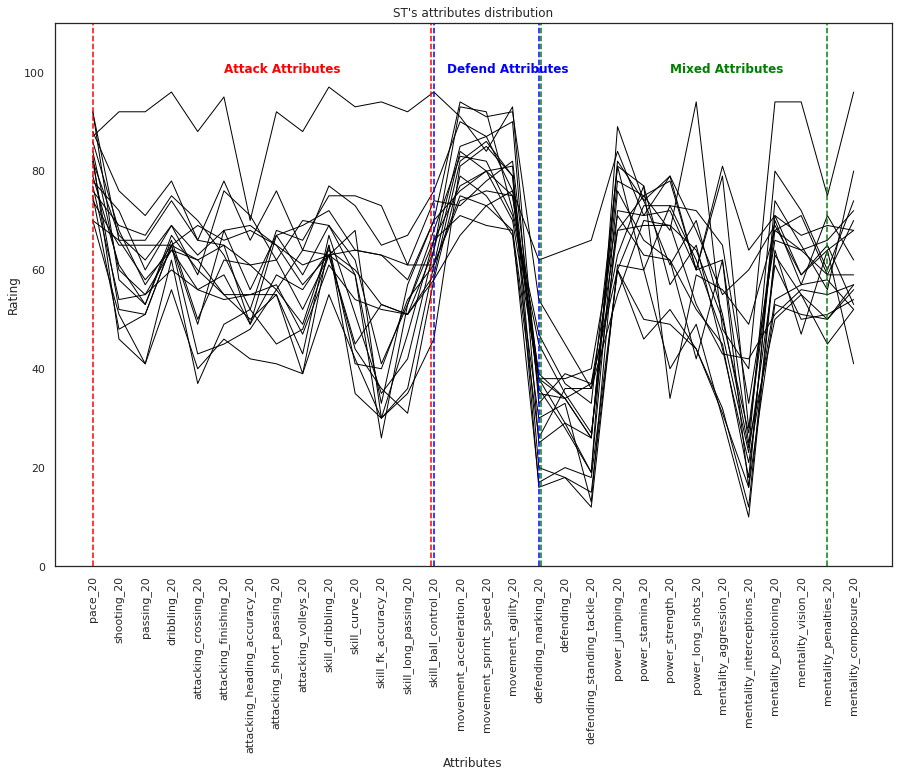

In [ ]:
fig, ax = plt.subplots()
df_new_ST = df_new[df_new['player_positions_20'] == 'ST'].iloc[::200,:-1]
df_new_ST.T.plot.line(color = 'black', figsize = (15,10), legend = False, ylim = (0, 110), title = "ST's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(12.9, color='red', linestyle='--')

ax.axvline(13, color='blue', linestyle='--')
ax.axvline(17, color='blue', linestyle='--')

ax.axvline(17.1, color='green', linestyle='--')
ax.axvline(28, color='green', linestyle='--')

ax.text(5, 100, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(13.5, 100, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(22, 100, 'Mixed Attributes', color = 'green', weight = 'bold')

The pattern is quite obvious, but some outliers are found. It is because some of the players are extremely good at their positions and some of them aren't. But I believe most of them should follow the similar pattern if we normalized them, for the same position. 

Text(22, 0.07, 'Mixed Attributes')

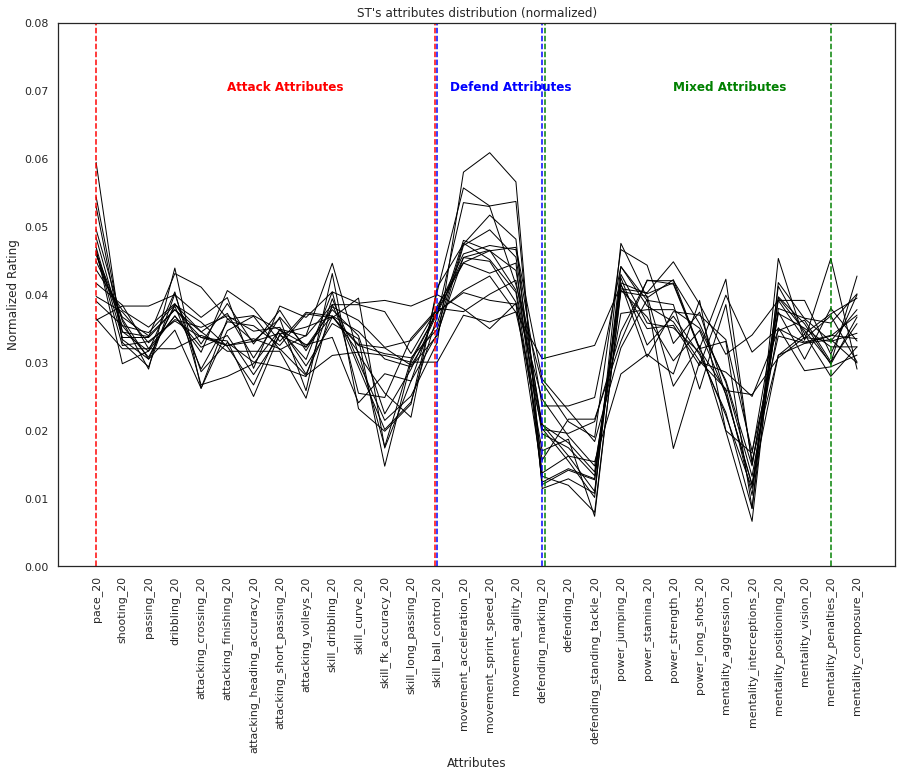

In [ ]:
df_new_ST_normalized = df_new_ST.div(df_new_ST.sum(axis=1), axis=0)

fig, ax = plt.subplots()
df_new_ST_normalized.T.plot.line(color = 'black', figsize = (15,10), ylim = (0, 0.08), legend = False, title = "ST's attributes distribution (normalized)", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Normalized Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(12.9, color='red', linestyle='--')

ax.axvline(13, color='blue', linestyle='--')
ax.axvline(17, color='blue', linestyle='--')

ax.axvline(17.1, color='green', linestyle='--')
ax.axvline(28, color='green', linestyle='--')

ax.text(5, 0.07, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(13.5, 0.07, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(22, 0.07, 'Mixed Attributes', color = 'green', weight = 'bold') 

<h4>Predict binary targets (attack vs defend positions) with logistic regression
The pattern after normalization looks much more obvious. Lets do below:</h4>

- Normalize the whole dataset
- Reclassify the target value (preferred positions) to binary groups as below:
- 1 = attack positions = ST, RW, LW, RM, CM, LM, CAM, CF
- 0 = defened positions = CDM, CB, LB, RB, RWB, LWB

Some of the player positions ended with a comma so I had to replace them using the replace function

In [ ]:
df_new = df_new.replace(',','', regex=True)

In [ ]:
df_new_normalized = df_new.iloc[:,:-1].div(df_new.iloc[:,:-1].sum(axis=1), axis=0)
mapping = {'ST': 1, 'RW': 1, 'LW': 1, 'RM': 1, 'CM': 1, 'LM': 1, 'CAM': 1, 'CF': 1, 'CDM': 0, 'CB': 0, 'LB': 0, 'RB': 0, 'RWB': 0, 'LWB': 0}
df_new_normalized['player_positions_20'] = df_new['player_positions_20']
df_new_normalized = df_new_normalized.replace({'player_positions_20': mapping})

df_new_normalized.iloc[::1000,]


,pace_20,shooting_20,passing_20,dribbling_20,attacking_crossing_20,attacking_finishing_20,attacking_heading_accuracy_20,attacking_short_passing_20,attacking_volleys_20,skill_dribbling_20,skill_curve_20,skill_fk_accuracy_20,skill_long_passing_20,skill_ball_control_20,movement_acceleration_20,movement_sprint_speed_20,movement_agility_20,defending_marking_20,defending_20,defending_standing_tackle_20,power_jumping_20,power_stamina_20,power_strength_20,power_long_shots_20,mentality_aggression_20,mentality_interceptions_20,mentality_positioning_20,mentality_vision_20,mentality_penalties_20,mentality_composure_20,player_positions_20
0,0.036235,0.038317,0.038317,0.039983,0.036651,0.039567,0.029155,0.038317,0.036651,0.040400,0.038734,0.039150,0.038317,0.039983,0.037901,0.034985,0.038734,0.013744,0.016243,0.015410,0.028322,0.031237,0.028322,0.039150,0.019992,0.016660,0.039150,0.039150,0.031237,0.039983,1
1000,0.046626,0.034010,0.031267,0.037301,0.032364,0.033461,0.028524,0.032364,0.028524,0.037301,0.032364,0.030719,0.028524,0.036204,0.044981,0.047724,0.041690,0.029073,0.023039,0.022490,0.038398,0.039495,0.040044,0.035107,0.026879,0.014811,0.036753,0.030170,0.027976,0.031816,1
2000,0.033854,0.035417,0.039062,0.040104,0.039583,0.036458,0.017708,0.040104,0.036979,0.040104,0.039583,0.033854,0.039062,0.040625,0.033854,0.033854,0.038542,0.018750,0.020313,0.022396,0.031250,0.033333,0.028646,0.034375,0.021354,0.020833,0.037500,0.039062,0.035937,0.037500,1
3000,0.026786,0.022879,0.034040,0.035156,0.021205,0.015067,0.042969,0.041295,0.017299,0.032924,0.029576,0.025112,0.040179,0.039621,0.027902,0.025670,0.029576,0.049665,0.047991,0.048549,0.042411,0.025112,0.045201,0.029576,0.045201,0.047991,0.016741,0.031808,0.020647,0.041853,0
4000,0.035831,0.021716,0.033659,0.036916,0.038002,0.018458,0.035288,0.035831,0.021716,0.036916,0.026059,0.022258,0.035831,0.036916,0.034745,0.036374,0.035831,0.033116,0.036916,0.039088,0.042345,0.042345,0.040174,0.014658,0.044517,0.038545,0.032573,0.027687,0.028230,0.037459,0
5000,0.037599,0.023651,0.033960,0.032747,0.028502,0.019406,0.036386,0.040631,0.024864,0.028502,0.020619,0.021225,0.035173,0.033354,0.038811,0.036992,0.043056,0.033960,0.038205,0.040024,0.040631,0.046089,0.043663,0.026076,0.040631,0.043056,0.019406,0.034566,0.027289,0.030928,0
6000,0.047950,0.020153,0.029187,0.027102,0.020153,0.017373,0.035441,0.036831,0.020848,0.017373,0.029882,0.020153,0.035441,0.036136,0.047950,0.047950,0.038916,0.035441,0.038916,0.043085,0.044475,0.048645,0.059069,0.019458,0.050730,0.038221,0.020153,0.020848,0.022933,0.029187,0
7000,0.031459,0.027169,0.035748,0.035272,0.033842,0.018112,0.029075,0.038132,0.025739,0.033842,0.025739,0.028122,0.036702,0.038132,0.032412,0.030505,0.034795,0.036225,0.034318,0.033842,0.034795,0.042898,0.032412,0.036702,0.036702,0.035272,0.033365,0.036225,0.034795,0.037655,1
8000,0.025552,0.032520,0.031940,0.030778,0.022067,0.029617,0.041231,0.036585,0.028455,0.030197,0.020906,0.023229,0.037166,0.032520,0.025552,0.025552,0.020906,0.043554,0.042393,0.041812,0.021487,0.042973,0.050523,0.033101,0.046458,0.042393,0.030778,0.034262,0.031359,0.044135,1
9000,0.034595,0.029189,0.034054,0.033514,0.029730,0.025946,0.029189,0.036216,0.031351,0.032432,0.032432,0.031892,0.035135,0.034054,0.036757,0.032432,0.034054,0.037297,0.035135,0.036216,0.033514,0.039459,0.039459,0.032973,0.035135,0.033514,0.030811,0.033514,0.025946,0.034054,1


In [ ]:
from sklearn.model_selection import train_test_split

The train-test split is a technique for evaluating the performance of a machine learning algorithm. It can be used for classification or regression problems and can be used for any supervised learning algorithm. The procedure involves taking a dataset and dividing it into two subsets.

Split train test dataset:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_new_normalized.iloc[:,:-1], df_new_normalized.iloc[:,-1], random_state=0)

print('X train shape: {}'.format(X_train.shape))
print('X test shape: {}'.format(X_test.shape))
print('y train shape: {}'.format(y_train.shape))
print('y test shape: {}'.format(y_test.shape))

X train shape: (29412, 30)
X test shape: (9804, 30)
y train shape: (29412,)
y test shape: (9804,)


Apply logistic regression to the training set 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier


In [ ]:
clf_d = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
acc_d = clf_d.score(X_test, y_test)
print ('Dummy Classifier (most frequent class): {}'.format(acc_d))

clf = LogisticRegression().fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print ('Logistic Regression Accuracy: {}'.format(acc))

Dummy Classifier (most frequent class): 0.6107711138310894
Logistic Regression Accuracy: 0.8474092207262341


Feature selections

Can we further improve the model accuracy by looking at the feature importance

In [ ]:
Coef_list = list(sorted(zip(X_train.columns, abs(clf.coef_[0])),key=lambda x: -x[1]))
Coef_table = pd.DataFrame(np.array(Coef_list).reshape(-1,2), columns = ['Attributes', 'Coef'])

print (Coef_table)

                       Attributes                Coef
0    defending_standing_tackle_20   24.72031597150694
1      mentality_interceptions_20     23.432215983669
2            defending_marking_20  22.259683904206565
3                    defending_20   22.22637806311498
4          attacking_finishing_20  17.906277270800782
5                     shooting_20   13.45381700840899
6            attacking_volleys_20  11.848958968710711
7        mentality_positioning_20   11.83394717960527
8             power_long_shots_20    11.6432993798306
9         mentality_aggression_20   11.10557263335755
10            mentality_vision_20   10.08186014281733
11              power_strength_20   8.514712045652777
12         mentality_penalties_20   8.115281662820403
13  attacking_heading_accuracy_20   7.812861483091969
14             skill_dribbling_20    7.53662455928593
15               power_jumping_20   7.267335732488823
16           skill_fk_accuracy_20   6.140228010964963
17                   dribbli

Limit the features to the top 10

In [ ]:
target_cols = Coef_table[:10]['Attributes'].tolist()

clf_2 = LogisticRegression().fit(X_train[target_cols], y_train)
acc_2 = clf_2.score(X_test[target_cols], y_test)
print ('Logistic Regression Accuracy (10 features): {}'.format(acc_2))

Logistic Regression Accuracy (10 features): 0.8480212158302733


The precision has improved marginally. Another interesting finding is that the positioning attribute is fairly important in the model and should probably not be categorized as a mix attribute, whereas some attack attributes, such as crossing, are not as important (possibly because LB / RB have high crossing ratings as well).

Another intriguing finding is that the most important traits are largely defensive, implying that they are most useful in determining a player's function. To put it another way, it's highly rare for a player in an offensive role like ST to be strong at certain defensive skills, yet it's much simpler for a player in a defensive role to be good at some attacking skills like crossing and free kick accuracy, among other things.

<h1>Conclusion</h1> 
The majority of the labor went into data preparation, I wanted to join two datasets, and most of the columns had to be renamed before I could do so.Several queries can be posed using the FIFA  player dataset. I came up with a couple of questions that I attempted to answer above. In response to my first question, I discovered that the majority of the players hail from England, Argentina, Spain, France, and Brazil.To locate specific groups, I utilized the kmeans clustering technique and visualized each player position in there own cluster. 
This exploration is just the tip of the iceberg, with advanced machine learning techniques and the correct set of questions, a lot can be accomplished and understood!